In [ ]:
%cd /content/drive/MyDrive/Colab/naampy/

/content/drive/MyDrive/Colab/naampy


In [ ]:
%ls

data/                 model.h5      train.ipynb
data.ipynb            model.png     train_rmse.ipynb
data_with_prop.ipynb  saved_model/  train_with_prop.ipynb


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Import data

In [ ]:
df = pd.read_csv("data/naampy_final_prop.csv")

In [ ]:
df.head()

,first_name,gender,female_prop
0,aa,male,0.044734
1,aaa,male,0.260188
2,aaaa,female,0.742647
3,aaaamsoo,female,0.675344
4,aaaan,male,0.029126


In [ ]:
df[df["first_name"].str.len() <= 2]

,first_name,gender,female_prop
0,aa,male,0.044734
3610,ab,male,0.311203
4358,ac,male,0.442623
4956,ag,male,0.300971
5153,ah,male,0.361169
...,...,...,...
196973,ys,male,0.445378
196974,yu,male,0.325714
197228,zd,male,0.430876
197247,zk,female,0.519231


In [ ]:
df = df.drop(df[df["first_name"].str.len() <= 2].index)

In [ ]:
df[df["first_name"].str.len() >= 20]

,first_name,gender,female_prop
21685,bhaanaabhagavaanavaalaa,male,0.491620
21746,bhaanooprathaapasimh,male,0.000000
22339,bhagaaouatheeprasaad,male,0.000000
32420,chandrakaamthaabaaee,female,1.000000
32429,chandrakaanthaabaaee,female,1.000000
32560,chandrasekharannayar,male,0.009174
56644,gopalakrishnakkurupp,male,0.000000
56647,gopalakrishnanachari,male,0.000000
90217,krishnaprathaapasimh,male,0.000000
91115,kumarakhaaneeyaasaaparaa,male,0.458065


In [ ]:
def find_seq_chars(s, seq_len=2):
    prev = ""
    count = 1
    match = False
    for i in s:
        if i == prev:
            count += 1
        else:
            count = 1

        prev = i
        if count == seq_len:
            return True
    return match

In [ ]:
df[df["first_name"].apply(lambda x: find_seq_chars(x, 3))]

,first_name,gender,female_prop
1,aaa,male,0.260188
2,aaaa,female,0.742647
3,aaaamsoo,female,0.675344
4,aaaan,male,0.029126
5,aaab,male,0.053333
...,...,...,...
196434,yeeelavaad,male,0.472603
196808,yoogamaaaa,female,0.996219
197076,yuliaaa,female,0.995633
197109,yuriaaa,male,0.239175


In [ ]:
df = df.drop(df[df["first_name"].apply(lambda x: find_seq_chars(x, 3))].index)

In [ ]:
df.shape

(195979, 3)

In [ ]:
import re


def find_numbers(x):
    return len(re.findall("[0-9]+", x)) > 0


df[df["first_name"].apply(lambda x: find_numbers(x))]

,first_name,gender,female_prop


In [ ]:
df.head()

,first_name,gender,female_prop
179,aab,male,0.292818
180,aabaa,male,0.351738
181,aabaad,male,0.047183
182,aabaadaa,female,0.983333
183,aabaadaar,female,0.515075


In [ ]:
df.shape

(195979, 3)

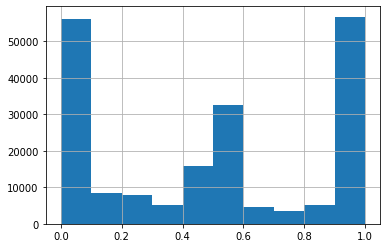

In [ ]:
df["female_prop"].hist()

# Split data

In [ ]:
X = df["first_name"].values
y = df["female_prop"].values

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

In [ ]:
X_train.size

137185

In [ ]:
np.unique(y_train, return_counts=True)

(array([0.00000000e+00, 1.96309384e-04, 1.96386489e-04, ...,
        9.99906323e-01, 9.99952094e-01, 1.00000000e+00]),
 array([6318,    1,    1, ...,    1,    1, 7516]))

In [ ]:
X_rem.size

58794

In [ ]:
np.unique(y_rem, return_counts=True)

(array([0.00000000e+00, 4.08496732e-04, 4.84496124e-04, ...,
        9.99889564e-01, 9.99904370e-01, 1.00000000e+00]),
 array([2850,    1,    1, ...,    1,    1, 3209]))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [ ]:
y_train[1]

0.5302013422818792

In [ ]:
X_train[1]

'bhakathi'

# Tokenization

In [ ]:
tk = Tokenizer(num_words=None, char_level=True, oov_token="UNK")

In [ ]:
tk.fit_on_texts(df["first_name"].values)

In [ ]:
alphabet = "abcdefghijklmnopqrstuvwxyz"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

In [ ]:
char_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [ ]:
tk.word_index

{'UNK': 27,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
df["first_name"].str.len().max()

24

In [ ]:
train_sequences = tk.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

[11, 1, 4, 1, 14, 15, 15, 18]

In [ ]:
X_train[0]

'kadanoor'

In [ ]:
validation_sequences = tk.texts_to_sequences(X_val)
test_sequences = tk.texts_to_sequences(X_test)

In [ ]:
# Padding
X_train = pad_sequences(train_sequences, maxlen=24, padding="post")
X_val = pad_sequences(validation_sequences, maxlen=24, padding="post")
X_test = pad_sequences(test_sequences, maxlen=24, padding="post")

In [ ]:
X_train[0]

array([11,  1,  4,  1, 14, 15, 15, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int32)

# Creating Dataset

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 200000

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))
first_name, gender_label = text_batch[0], label_batch[0]
print("Name", first_name)
print("Label", gender_label)

Name tf.Tensor([19  1  2  1 14  1 13  1  2  5  5  0  0  0  0  0  0  0  0  0  0  0  0  0], shape=(24,), dtype=int32)
Label tf.Tensor(0.9968503937007874, shape=(), dtype=float64)


# Vectorization

In [ ]:
vocab_size = len(tk.word_index)
vocab_size

27

In [ ]:
embedding_weights = []
embedding_weights.append(np.zeros(vocab_size))  # first row is pad

for char, i in tk.word_index.items():
    onehot = np.zeros(vocab_size)
    onehot[i - 1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)

In [ ]:
print(embedding_weights.shape)  # first row all 0 for PAD, 26 char, last row for UNK
embedding_weights

(28, 27)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
# max length of first name
input_size = 24
# vocab_size = 27
embedding_size = 27
conv_layers = [[128, 7, 3], [128, 3, -1], [128, 3, -1]]

fully_connected_layers = [512, 512]
dropout_p = 0.5

In [ ]:
# Embedding layer Initialization
embedding_layer = tf.keras.layers.Embedding(
    vocab_size + 1, embedding_size, input_length=input_size, weights=[embedding_weights]
)

# Model

In [ ]:
# Input
inputs = tf.keras.layers.Input(
    shape=(input_size,), name="input", dtype="int64"
)  # shape=(?, 24)
# Embedding
x = embedding_layer(inputs)


# Conv
for filter_num, filter_size, pooling_size in conv_layers:
    print(filter_num, filter_size, pooling_size)
    x = tf.keras.layers.Conv1D(filter_num, filter_size)(x)
    x = tf.keras.layers.Activation("relu")(x)
    if pooling_size != -1:
        x = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(
            x
        )  # Final shape=(None, 34, 256)
    print(x)
x = tf.keras.layers.Flatten()(x)  # (None, 8704)
# Fully connected layers
for dense_size in fully_connected_layers:
    x = tf.keras.layers.Dense(dense_size, activation="relu")(x)  # dense_size == 1024
    x = tf.keras.layers.Dropout(dropout_p)(x)
# Output Layer
predictions = tf.keras.layers.Dense(1, activation="sigmoid")(x)
# Build model
model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
model.compile(
    optimizer="sgd", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()]
)  # Adam, categorical_crossentropy
model.summary()

128 7 3
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 128), dtype=tf.float32, name=None), name='max_pooling1d_8/Squeeze:0', description="created by layer 'max_pooling1d_8'")
128 3 -1
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 128), dtype=tf.float32, name=None), name='activation_25/Relu:0', description="created by layer 'activation_25'")
128 3 -1
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 128), dtype=tf.float32, name=None), name='activation_26/Relu:0', description="created by layer 'activation_26'")
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 24, 27)            756       
                                                                 
 conv1d_24 (Conv1D)          (None, 18, 128)           24320     
  

In [ ]:
model_save_filename = "model.h5"

In [ ]:
batch_size = 64
epochs = 500

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_root_mean_squared_error",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True,
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor="val_root_mean_squared_error",
    mode="min",
    verbose=1,
    save_best_only=True,
)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)

Epoch 1/500
2134/2144 [============================>.] - ETA: 0s - loss: 0.1479 - root_mean_squared_error: 0.3845
Epoch 1: val_root_mean_squared_error improved from inf to 0.38397, saving model to model.h5
2144/2144 [==============================] - 11s 5ms/step - loss: 0.1479 - root_mean_squared_error: 0.3845 - val_loss: 0.1474 - val_root_mean_squared_error: 0.3840
Epoch 2/500
2144/2144 [==============================] - ETA: 0s - loss: 0.1456 - root_mean_squared_error: 0.3816
Epoch 2: val_root_mean_squared_error improved from 0.38397 to 0.37745, saving model to model.h5
2144/2144 [==============================] - 10s 5ms/step - loss: 0.1456 - root_mean_squared_error: 0.3816 - val_loss: 0.1425 - val_root_mean_squared_error: 0.3775
Epoch 3/500
2135/2144 [============================>.] - ETA: 0s - loss: 0.1343 - root_mean_squared_error: 0.3665
Epoch 3: val_root_mean_squared_error improved from 0.37745 to 0.34407, saving model to model.h5
2144/2144 [==============================] - 1

# Evaluate

In [ ]:
loss, root_mean_squared_error = model.evaluate(test_dataset)

print("Loss: ", loss)
print("rmse: ", root_mean_squared_error)

460/460 [==============================] - 1s 3ms/step - loss: 0.0526 - root_mean_squared_error: 0.2293
Loss:  0.05255719646811485
rmse:  0.22925356030464172


# Calibration Plot

In [ ]:
test_txt = []
test_labels = []

for txt, label in test_dataset:
    for t in txt:
        test_txt.append(t.numpy())
    for l in label:
        test_labels.append(l.numpy())

In [ ]:
test_txt = np.array(test_txt)
test_labels = np.array(test_labels)

In [ ]:
predicted = model.predict(test_txt)

In [ ]:
predicted

array([[0.72793114],
       [0.61777604],
       [0.38514984],
       ...,
       [0.5513206 ],
       [0.8102438 ],
       [0.9178699 ]], dtype=float32)

In [ ]:
y_true = test_labels

In [ ]:
y_pred = predicted.transpose()[0]

In [ ]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=3)

ValueError: ignored

# Plot

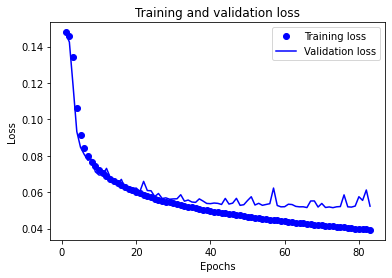

In [ ]:
history_dict = history.history
history_dict.keys()

rmse = history_dict["root_mean_squared_error"]
val_rmse = history_dict["val_root_mean_squared_error"]

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(rmse) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, "bo", label="Training loss")
# b is for "solid blue line"
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

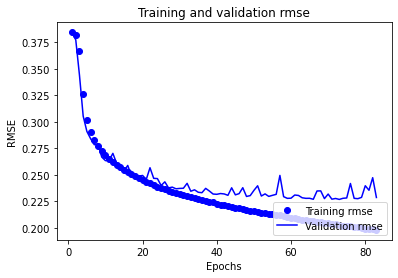

In [ ]:
plt.plot(epochs, rmse, "bo", label="Training rmse")
plt.plot(epochs, val_rmse, "b", label="Validation rmse")
plt.title("Training and validation rmse")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend(loc="lower right")

plt.show()

# Save model

In [ ]:
model.save("saved_model/naampy_rmse")

INFO:tensorflow:Assets written to: saved_model/naampy_rmse/assets


In [ ]:
df[df["first_name"] == "katrina"]

,first_name,gender,female_prop


# Inference

In [ ]:
input = [
    "rajinikanth",
    "harvin",
    "shyamsingha",
    "kamalhasan",
    "srihan",
    "thammam",
    "bahubali",
    "rajarajeshwari",
    "shobby",
    "tamannaah bhatia",
    "mehreen",
    "kiara",
    "shivathmika",
    "komalee",
    "nazriya",
    "nabha",
    "taapsee",
    "parineeti",
    "katrina",
    "ileana",
    "vishwaksen",
    "sampoornesh",
    "hrithik",
    "emraan",
    "rajkummar",
    "sharman",
    "ayushmann",
    "irrfan",
    "riteish",
]

sequences = tk.texts_to_sequences(input)
final = pad_sequences(sequences, maxlen=24, padding="post")
print(final)

[[18  1 10  9 14  9 11  1 14 20  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  1 18 22  9 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  8 25  1 13 19  9 14  7  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  1 13  1 12  8  1 19  1 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19 18  9  8  1 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  8  1 13 13  1 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  8 21  2  1 12  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  1 10  1 18  1 10  5 19  8 23  1 18  9  0  0  0  0  0  0  0  0  0  0]
 [19  8 15  2  2 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  1 13  1 14 14  1  1  8 27  2  8  1 20  9  1  0  0  0  0  0  0  0  0]
 [13  5  8 18  5  5 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  9  1 18  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  8  9 22  1 20  8 13  9 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11 15 13  1 12  5  5  0

In [ ]:
results = model.predict(final)

In [ ]:
results

array([[0.00525352],
       [0.15928783],
       [0.04309655],
       [0.65595573],
       [0.17445782],
       [0.5642862 ],
       [0.09884076],
       [0.94247806],
       [0.21168596],
       [0.9714784 ],
       [0.659633  ],
       [0.6141249 ],
       [0.74323916],
       [0.9010507 ],
       [0.8541673 ],
       [0.7550282 ],
       [0.6651763 ],
       [0.8132367 ],
       [0.63012594],
       [0.64033115],
       [0.00776255],
       [0.05969306],
       [0.07781889],
       [0.20403717],
       [0.15486132],
       [0.14146173],
       [0.035105  ],
       [0.16294746],
       [0.04924516]], dtype=float32)

In [ ]:
results[0].item()

0.005253518465906382

In [ ]:
for i in range(len(input)):
    pred = results[i].item()
    if pred > 0.5:
        gender = "female"
    else:
        gender = "male"
    print(f"{input[i]} : {gender} : {pred}")

rajinikanth : male : 0.005253518465906382
harvin : male : 0.15928782522678375
shyamsingha : male : 0.04309655353426933
kamalhasan : female : 0.6559557318687439
srihan : male : 0.17445781826972961
thammam : female : 0.5642861723899841
bahubali : male : 0.09884075820446014
rajarajeshwari : female : 0.9424780607223511
shobby : male : 0.21168595552444458
tamannaah bhatia : female : 0.9714784026145935
mehreen : female : 0.6596329808235168
kiara : female : 0.6141248941421509
shivathmika : female : 0.743239164352417
komalee : female : 0.9010506868362427
nazriya : female : 0.8541672825813293
nabha : female : 0.7550281882286072
taapsee : female : 0.665176272392273
parineeti : female : 0.8132367134094238
katrina : female : 0.6301259398460388
ileana : female : 0.6403311491012573
vishwaksen : male : 0.007762552239000797
sampoornesh : male : 0.05969305709004402
hrithik : male : 0.07781888544559479
emraan : male : 0.20403717458248138
rajkummar : male : 0.15486131608486176
sharman : male : 0.14146173

# load and test the model

In [ ]:
import_model = tf.keras.models.load_model("saved_model/naampy_rmse")

In [ ]:
import_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 24, 27)            756       
                                                                 
 conv1d_24 (Conv1D)          (None, 18, 128)           24320     
                                                                 
 activation_24 (Activation)  (None, 18, 128)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 conv1d_25 (Conv1D)          (None, 4, 128)            49280     
                                                           

In [ ]:
results = import_model.predict(final)
for i in range(len(input)):
    pred = results[i].item()
    if pred > 0.5:
        gender = "female"
    else:
        gender = "male"
    print(f"{input[i]} : {gender} : {pred}")

rajinikanth : male : 0.005253518465906382
harvin : male : 0.15928782522678375
shyamsingha : male : 0.04309655353426933
kamalhasan : female : 0.6559557318687439
srihan : male : 0.17445781826972961
thammam : female : 0.5642861723899841
bahubali : male : 0.09884075820446014
rajarajeshwari : female : 0.9424780607223511
shobby : male : 0.21168595552444458
tamannaah bhatia : female : 0.9714784026145935
mehreen : female : 0.6596329808235168
kiara : female : 0.6141248941421509
shivathmika : female : 0.743239164352417
komalee : female : 0.9010506868362427
nazriya : female : 0.8541672825813293
nabha : female : 0.7550281882286072
taapsee : female : 0.665176272392273
parineeti : female : 0.8132367134094238
katrina : female : 0.6301259398460388
ileana : female : 0.6403311491012573
vishwaksen : male : 0.007762552239000797
sampoornesh : male : 0.05969305709004402
hrithik : male : 0.07781888544559479
emraan : male : 0.20403717458248138
rajkummar : male : 0.15486131608486176
sharman : male : 0.14146173